# Machine Learning

The main premise of discussion here is "machine learning" but what do we mean when we say learning? It refers to the process where models predict something, calculate how wrong they were and learn from their mistake by updating choices that led to the initial prediction. 

The typical machine learning loop looks like the following: 

1. **Forward Pass**: Given input x and parameter w, model predicts the output.
2. **Loss Calculation**: The model calculates the loss i.e the difference between actual output and predicted output.
4. **Backward Pass**: The model computes the blame of each parameter for loss i.e it calculates the derivative of the loss function wrt the parameters using local gradient computation and chain rule. 
5. **Optimization**: The model weights are updated to reduce loss using algorithms like gradient descent.

### Example Setup

- **Input**: $ x = 2 $
- **Target Output/Label**: $10$
- **Model Function**: $y= w \times x$
- **Initial Weight**:$ w = 3 $


**Step 1: Forward Pass**

$$\text{prediction} = w \times x = 3 \times 2 = 6$$

---

**Step 2: Loss Calculation**

Using the Mean Squared Error (MSE) loss function:

$$\text{loss} = (y - \text{prediction})^2 = (10 - 6)^2 = 16$$

---

**Step 4: Backward Pass**


- Derivative of Loss with respect to Prediction:

   $$\frac{\partial \text{loss}}{\partial \text{prediction}} = 2 \times (y - \text{prediction}) = 2 \times (10 - 6) = 2 \times 4 = 8$$

- Derivative of Prediction with respect to Weight:

   $$\frac{\partial \text{prediction}}{\partial w} = x = 2$$

Using the chain rule, we get

   $$\frac{\partial \text{loss}}{\partial w} = \frac{\partial \text{loss}}{\partial \text{prediction}} \times \frac{\partial \text{prediction}}{\partial w} = 8 \times 2 = 16$$

---

**Step 5: Optimization**

Using gradient descent with a learning rate $\alpha = 0.1 $:

$$w = w - \alpha \times \frac{\partial \text{loss}}{\partial w}$$

Substitute the values:

$$w = 3 - 0.1 \times 16 = 3 - 1.6 = 1.4$$

After this update, the new weight $ w $ is 1.4.

In [18]:
# Simple ML Algorithm (One Training Loop)
# defining inputs
x=torch.tensor(1.)
y=torch.tensor(2.0)
w= torch.tensor(1.0,requires_grad=True)
print(w)

# forward pass
y_hat= w*x

# loss calculation
loss=(y_hat-y)**2

# backward pass
# includes local grdaient computation
loss.backward()
print(w.grad) # the gradient of weight wrt loss

# parameter update
# use gradient descent
alpha=0.1 #set learning rate
w=w-alpha*w.grad
print(w)

tensor(1., requires_grad=True)
tensor(-2.)
tensor(1.2000, grad_fn=<SubBackward0>)


# Pytorch 

PyTorch is an important tensor library used for machine learning which supports differentiable vectors. So, let's take a look at some basic operations in pytorch tensors first. 

In [1]:
import numpy as np
import torch
from torch import nn

## Basic Functions

This includes some basic functions we can do with PyTorch tensors like creating tensors, operations and conversions. 

In [2]:
# creating special tensors with given dimensions
x= torch.empty(2,2) # also torch.rand(), torch.zeros(), torch.ones()
print(x, x.dtype, x.size())

# elementwise addition/subtraction
# in torch all func_ formats will do inplace operations
x=torch.tensor ([[2,3],[4,5]])
y=torch.tensor ([[1,1],[1,1]])
print(x+y) # also with x.add_(y) and torch.add(x,y)

# elementwise multiplication/division
x=torch.tensor ([[2,3],[4,5]])
y=torch.tensor ([[2,1],[2,1]])
print(torch.mul(x,y))
print(torch.div(x,y))

# slicing
x=torch.tensor ([[2,3],[4,5]])
print(x[:1,:])
print(x[1,1].item()) # .item() can be used when tensor's single element is to be extracted

# reshaping
x=torch.tensor ([[2,3],[4,5]])
y=x.view(4,1) #giving new dimensions
print(y)
z= x.view (-1,4)  # specifying one dim for reshape and -1 indicates no preference where torch will assume dim
print(z)

tensor([[0., 0.],
        [0., 0.]]) torch.float32 torch.Size([2, 2])
tensor([[3, 4],
        [5, 6]])
tensor([[4, 3],
        [8, 5]])
tensor([[1., 3.],
        [2., 5.]])
tensor([[2, 3]])
5
tensor([[2],
        [3],
        [4],
        [5]])
tensor([[2, 3, 4, 5]])


In [3]:
# tensor <> numpy conversion
# if on cpu, then they both occupy same memory (can check with inplace addition on 1 and other is affected)
# check gpu with torch.backends.mps.is_available() followed by device=torch.device and .to(device)
a=torch.ones(2,2)
print(a)
b=a.numpy()
print(b)
a.add_(1) # inplace addition in torch
print(a,b)

c=np.ones([3,3])
print(c)
d=torch.from_numpy(c)
print(d)
c+=(1) # inplace addition in numpy
print(c,d)

tensor([[1., 1.],
        [1., 1.]])
[[1. 1.]
 [1. 1.]]
tensor([[2., 2.],
        [2., 2.]]) [[2. 2.]
 [2. 2.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]] tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)


## Differentiability

In the context of machine learning, the backpropagation or backward pass requires the calculation of gradients for model parameters. In torch, gradient calculation is not automatically done but needs to be prespecified. 

In [36]:
# differentiability in torch
# when we want to calculate gradient on a tensor we need to specify it so
# for function using that variable, a computation graph is created where every node stores gradient of a function wrt the tensor
# set with requires_grad=True
x=torch.ones(2,2,requires_grad=True) 
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [35]:
# separate functions involving the differentiable value
# sample 1
y=2+x
print(y) # add backward gradient will be calculated wrt x
v= torch.ones(2,2)
y.backward(v) # gradient calculated wrt x
print(x.grad) #gives dy/dx
# sample 2
z=2*x
print(z) # multiply backward gradient will be calculated wrt x
v= torch.ones(2,2)
z.backward(v) # gradient calculated wrt x
print(x.grad) # gives dz/dx

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]], grad_fn=<MulBackward0>)
tensor([[3., 3.],
        [3., 3.]])


In [37]:
# related functions involving differentiable values
y= 2+x
print(y) # add backward gradient will be calculated wrt x
v= torch.ones(2,2)
y.backward(v) # gradient calculated wrt x
print(x.grad) #gives dy/dx

z=y.mean()
print(z) # multiply backward gradient will be calculated wrt x
z.backward() # gradient calculated wrt x
print(x.grad)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[1., 1.],
        [1., 1.]])
tensor(3., grad_fn=<MeanBackward0>)
tensor([[1.2500, 1.2500],
        [1.2500, 1.2500]])


# Forward Pass

The forward pass of a model involves taking in an input and returning an output based on the predefined model computations

# Loss

The loss calculation typically involves calculation of a scalar value that indicates difference between desired output and model prediction. 

# Backward Pass

Also know as backpropagation, the backward pass of a model involves computing the gradients of all parameters of the model wrt the loss value. There are three important ingredients to backpropagation: 

1. **Computation Graph**: For any given series of functions, we create a graph of nodes which indicates input, output and parameters of each function in series. 
2. **Local Gradient Computation**: The model parameters are specified to be differentiable tensors and for each node in the computation graph of the model, we calculate local gradients i.e for any function in the model where y is output and x is input , we have $ \frac{df}{dx}$.
3. **Chain Rule**: Using the computation graph and the local gradients, we obtain the gradient of final loss wrt parameters of each function.

In [16]:
# let z be a function of y and y be a function using x as input and w as parameter
x= torch.ones(4)
print(x)
w=torch.randn(4, requires_grad=True) # parameter gradients are needed
print(w)
y= w+x
print(y)
z=y.mean()
print(z)


# for calculating gradient of loss with x (dz/dx)
dzdx= z.backward()
print(f'dz/dx is {w.grad}')
# dy/dx needs jacobian vector v
v= torch.tensor([1,2,1,2])
dydx= y.backward(v)
print(f'dy/dx is {w.grad}')

tensor([1., 1., 1., 1.])
tensor([-0.9518,  1.9631,  1.2413,  0.0360], requires_grad=True)
tensor([0.0482, 2.9631, 2.2413, 1.0360], grad_fn=<AddBackward0>)
tensor(1.5721, grad_fn=<MeanBackward0>)
dz/dx is tensor([0.2500, 0.2500, 0.2500, 0.2500])
dy/dx is tensor([1.2500, 2.2500, 1.2500, 2.2500])


In [17]:
# avoiding gradient tracking
# necessary when we do not want gradient tracked
x= torch.ones(4)

# Option 1 
x.requires_grad_(False)
print(x)

#Option 2
y=x.detach()
print(y)

# Option 3
with torch.no_grad(): 
    y=x+2
    print(y)

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([3., 3., 3., 3.])


In [7]:
# toy training loop (from scratch)
# let toy function be y=wx where x is input and w is weight matrix
print("-----defining inputs------")
x=torch.randn(2,2)
print(x)
w=torch.ones([2,2],requires_grad=True) # weights need gradients to be updated
print(w)

print("-----training loop starts------")

# write training loop for updation
for epoch in range(2): 
    # define output function within loop
    y=torch.matmul(w,x)
    v=torch.tensor([[0.1,0.1],[0.11,0.11]])
    y.backward(v) # irl we do loss.backward() which calculates local gradients for all weight 
    print(w.grad) # now each parameter has a gradient associated which is multiplied to get loss gradient as a whole
    w.grad.zero_() # ensure gradients are not being added up for every pass

-----defining inputs------
tensor([[-0.0551, -0.2824],
        [ 1.2463,  0.6389]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
-----training loop starts------
tensor([[-0.0337,  0.1885],
        [-0.0371,  0.2074]])
tensor([[-0.0337,  0.1885],
        [-0.0371,  0.2074]])


# Linear Regression

The typical steps for model specification include: 

1. Design model (input, output, forward pass)
2. Construct loss
3. Construct optimizer

The typical steps for training loop include: 

1. Forward Pass: Get predicted output
2. Loss: Get loss
3. Backward: Do backward on calculated loss
4. Optimization: Update parameters
5. Zeroing Gradients: Set gradients to zero

## Toy Implementations

In [19]:
# implementation from scratch using numpy & manual gradient
# regression function general form: y=w*x +b 
# for this example, ideal w=2 and ignore b: y=2*x

# inputs
X=np.array([1,2,3,4],dtype=np.float32)
# outputs
Y= np.array([2,4,6,8], dtype=np.float32)
# initialize weights
w=0.0 

# model training
# step 1: forward pass
def forward(x): 
    return w*x

# step 2: loss calculation with MSE
def loss(y,y_predicted): 
    return ((y_predicted-y)**2).mean() 

# step 3: backward pass
# MSE=1/N*(w*x-y)**2
# dLoss/dw=1/N 2x(w*x-y)
def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()


# implementing training
# initial prediction
print(f'Prediction before training:f(5)={forward(5):.3f}')
# setting hyperparameters
learning_rate=0.01
n_iters=10
# training loop
for epoch in range(n_iters): 
    # forward
    y_pred=forward(X)
    # loss
    l=loss(Y,y_pred)
    # backward 
    dlw=gradient (X,Y,y_pred)
    # parameter updation
    w=w-learning_rate*dlw

    if epoch%1==0:
        print(f'epoch {epoch+1}:w = {w:.3f}, loss={l:.8f}')
# final prediction
print(f'Prediction after training:f(5)={forward(5):.3f}')

Prediction before training:f(5)=0.000
epoch 1:w = 1.200, loss=30.00000000
epoch 2:w = 1.680, loss=4.80000067
epoch 3:w = 1.872, loss=0.76800019
epoch 4:w = 1.949, loss=0.12288000
epoch 5:w = 1.980, loss=0.01966083
epoch 6:w = 1.992, loss=0.00314574
epoch 7:w = 1.997, loss=0.00050332
epoch 8:w = 1.999, loss=0.00008053
epoch 9:w = 1.999, loss=0.00001288
epoch 10:w = 2.000, loss=0.00000206
Prediction after training:f(5)=9.999


In [12]:
# implementation from scratch using pytorch (no manual gradient needed)
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)
w= torch.tensor(0.0,dtype=torch.float32, requires_grad=True)

# forward
def forward(x): 
    return w*x
#loss
def loss(y,y_pred): 
    return ((y_pred-y)**2).mean()

# optimizer
lr=0.01

# initial prediction
print(f'Prediction before training:f(5)={forward(5):.3f}')

# training loop
n_iters=10
for epoch in range(n_iters): 
    y_pred=forward(X)
    l= loss(Y,y_pred)
    l.backward()
    with torch.no_grad():
        w-=lr*w.grad # inplace assignment to avoid breaking of w's computation graph wrt l
    w.grad.zero_()
    print(f'epoch {epoch+1}:w = {w:.3f}, loss={l:.8f}')

# final prediction
print(f'Prediction after training:f(5)={forward(5):.3f}')

Prediction before training:f(5)=0.000
epoch 1:w = 0.300, loss=30.00000000
epoch 2:w = 0.555, loss=21.67499924
epoch 3:w = 0.772, loss=15.66018772
epoch 4:w = 0.956, loss=11.31448650
epoch 5:w = 1.113, loss=8.17471695
epoch 6:w = 1.246, loss=5.90623236
epoch 7:w = 1.359, loss=4.26725292
epoch 8:w = 1.455, loss=3.08308983
epoch 9:w = 1.537, loss=2.22753215
epoch 10:w = 1.606, loss=1.60939169
Prediction after training:f(5)=8.031


In [12]:
# pipeline implementation
X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)
n_samples,n_features=X.shape
print(n_samples,n_features)

# forward
input_size=n_features
output_size= n_features
model=nn.Linear(input_size,output_size)
    
# loss
loss=nn.MSELoss()

# optimizer
lr=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

# initial prediction
# test tensor
X_test=torch.tensor([5], dtype=torch.float32)
print(f'Prediction before training:f(5)={model(X_test).item():.3f}')
                          
# training loop  
n_iters=10
for epoch in range(n_iters): 
    y_pred=model(X)
    l= loss(Y,y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}:w = {w[0][0].item():.3f}, loss={l:.8f}')

# final prediction
print(f'Prediction after training:f(5)={model(X_test).item():.3f}')

4 1
Prediction before training:f(5)=-4.286
epoch 1:w = -0.293, loss=64.87908936
epoch 2:w = 0.075, loss=45.02212524
epoch 3:w = 0.381, loss=31.24377632
epoch 4:w = 0.636, loss=21.68325424
epoch 5:w = 0.848, loss=15.04938126
epoch 6:w = 1.025, loss=10.44625664
epoch 7:w = 1.173, loss=7.25222349
epoch 8:w = 1.296, loss=5.03592730
epoch 9:w = 1.398, loss=3.49806452
epoch 10:w = 1.483, loss=2.43095160
Prediction after training:f(5)=7.544


## Real Implementation

epoch: 10, loss = 4007.7766
epoch: 20, loss = 2825.2451
epoch: 30, loss = 2019.2202
epoch: 40, loss = 1469.7080
epoch: 50, loss = 1094.9955
epoch: 60, loss = 839.4261
epoch: 70, loss = 665.0818
epoch: 80, loss = 546.1240
epoch: 90, loss = 464.9413
epoch: 100, loss = 409.5280


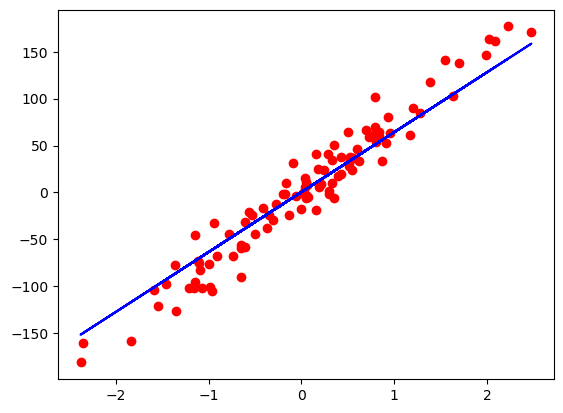

In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss
criterion = nn.MSELoss()

# optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X)
    #loss
    loss = criterion(y_predicted, y)
    # backward pass
    loss.backward()
    # optimization
    optimizer.step()
    # zero grad 
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Logistic Regression

## Simple Implementation

In [49]:
# imports
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data
# load and split
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
# reshape output 
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


# model
# linear model f = wx + b with sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# loss
criterion = nn.BCELoss() #implement by hand if possible

# optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward
    y_pred = model(X_train)
    # loss
    loss = criterion(y_pred, y_train)
    # backward
    loss.backward()
    # optimizer
    optimizer.step()
    # zero grad 
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# evaluation 
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round() # get softmax in real
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.5751
epoch: 20, loss = 0.4857
epoch: 30, loss = 0.4260
epoch: 40, loss = 0.3832
epoch: 50, loss = 0.3508
epoch: 60, loss = 0.3253
epoch: 70, loss = 0.3045
epoch: 80, loss = 0.2872
epoch: 90, loss = 0.2725
epoch: 100, loss = 0.2598
accuracy: 0.9298


In [30]:
# For logistic regression,  Softmax and CE Loss are important for getting results

# SOFTMAX: converts scores to probabilities
# in numpy
def softmax(x): 
    return np.exp(x)/np.sum(np.exp(x),axis=0)
x=np.array ([2.0,1.0,0.1])
outputs=softmax(x)
print(f'The numpy softmaxed output is:{outputs}')

# in pytorch
x=torch.tensor ([2.0,1.0,0.1])
outputs=torch.softmax(x,dim=0)
print(f'The torch softmaxed output is:{outputs}')


# CROSS ENTROPY LOSS: measures divergence of two distributions
# Y should be one hot encoding
# Y_pred should be probabilities
# in numpy
def celoss(actual, predicted): 
    loss= np.sum(actual*np.log(predicted))
    return loss
Y= np.array ([1,0,0])
Y_pred=np.array([0.7,0.2,0.1])
l=celoss(Y, Y_pred)
print(f'The numpy cross entropy loss is {l}')
# in torch
loss=nn.CrossEntropyLoss() #already applies nn.LogSoftmax + nn.NLLLoss
# here Y needs to be class labels (not one hot) 
Y= torch.tensor ([0])
Y_pred=torch.tensor([[2.0,1.0,0.1]]) #nsamples X nclasses
# here Y_pred needs to be raw logit scores (not softmax)
l= loss(Y_pred,Y)
_,predictions=torch.max(Y_pred,1)
print(f'The torch cross entropy loss is {l.item()}')
print(f'The torch cross entropy loss prediction is {predictions}')

The numpy softmaxed output is:[0.65900114 0.24243297 0.09856589]
The torch softmaxed output is:tensor([0.6590, 0.2424, 0.0986])
The numpy cross entropy loss is -0.35667494393873245
The torch cross entropy loss is 0.4170299470424652
The torch cross entropy loss prediction is tensor([0])


# Scikit Learn Implementations

## Linear Regression

(100, 1)
(100, 1)


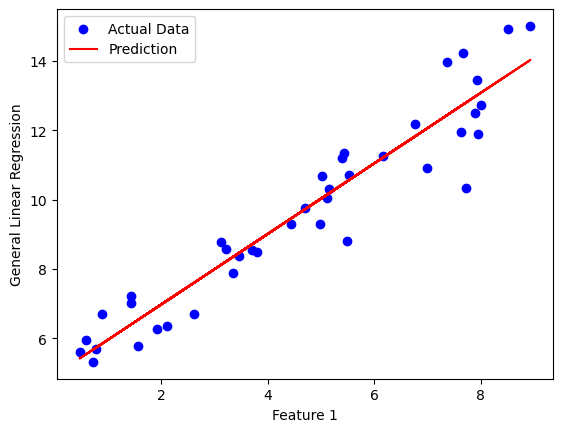

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# creating a dataset based y=2x+3
X= np.random.rand(100,1)*10
print(X.shape)
X_train, X_test= X[:60], X[60:]
y=2+X +3 + np.random.randn(100,1)
print(y.shape)
y_train, y_test= y[:60], y[60:]


# model inference
model=LinearRegression()
model.fit(X_train, y_train)

# evaluating model
y_pred= model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

# plotting model
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Prediction")
plt.xlabel("Feature 1")
plt.ylabel("General Linear Regression")
plt.legend()
plt.show()

## Logistic Regression

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# setting up data
iris= datasets.load_iris()
X= iris.data
y=  iris.target
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.3)

# model inference
model=LogisticRegression(multi_class='auto')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# evaluation 
accuracy=accuracy_score(y_test, y_pred)
classification= classification_report(y_test, y_pred)
print(f'The accuracy is {accuracy}')
print(f'The classification score is {classification}')

The accuracy is 0.9777777777777777
The classification score is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/Users/ruchira/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ruchira/miniforge3/envs/aienv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine

Support Vector Machine (SVM) is a type of supervised machine learning algorithm that aims to find the best boundary that divides the classes of data. The key concepts in an SVM involve: 

- Hyperplane: The dividing boundary
- Support Vector: The points closes to the hyperplane which determine what the hyperplane look like.
- Margin: The gap between the hyperplane and the nearest data points from each class. SVM aims to maximize this margin to improve the model's ability to generalize.

The hyperplane kernel depends on data: 

- Linear Kernel
- Non-linear Kernel (rbf or polynomial)

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# setting up data
iris=datasets.load_iris()
X,y=iris.data, iris.target
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.6)

# model inference
model= SVC(kernel='linear', C=1.0, random_state=0) # c is regularization parameter
model.fit(X_train, y_train)
y_pred=model.predict(X_test) 

# accuracy
accuracy= accuracy_score(y_test,y_pred)
classification= classification_report(y_test, y_pred)
print(f'The accuracy is {accuracy}')
print(f'The classification score is {classification}')

The accuracy is 0.9888888888888889
The classification score is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        28
           2       0.97      1.00      0.99        33

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



## Decision Tree Classifier

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load data and split
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Initialize and fit the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


## K Means Clustering

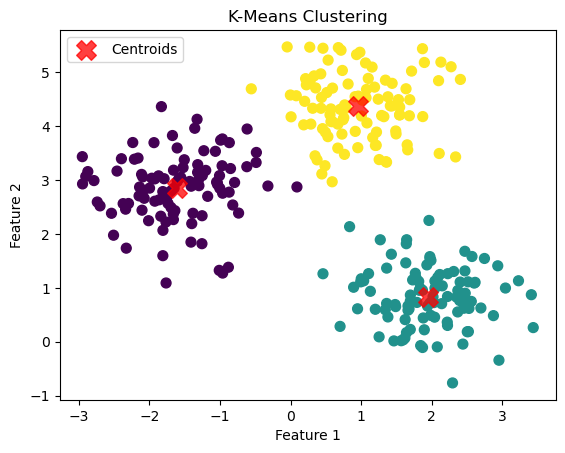

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# setting up data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Step 2: Fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Step 3: Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Step 4: Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()